# Loading Data and Imports

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Project Information

Goal of project is to use NBA data collected to draw insights, such as possibly predicting number of wins by team from team statistics and player statistics. Another possibility is using team statistics and data to predict the over/under for each NBA matchup in a season.

Proposed method of creating such a model is to use regression. Possible models I plan to implement are focused on Random Forest Regressor and Gradient Boosting Regressor.

Possible risks and roadblocks of creating such a model would be that teams often change their starting lineups and injuries can significantly alter a team's chances of winning. Feature selection could also be difficult.

Initial EDA includes cleaning of data, checking for and dropping null or missing values

# '16-'17 Season Data and EDA

In [2]:
df = pd.read_csv('NBA1.csv')
df.head()

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,Unnamed: 19,OWS,DWS,WS,WS/48,Unnamed: 24,OBPM,DBPM,BPM,VORP
0,1,Alex Abrines,SG,23,OKC,68,1055,10.1,0.560,0.724,...,NaN,1.2,0.9,2.1,0.096,NaN,-0.3,-2.2,-2.5,-0.1
1,2,Quincy Acy,PF,26,TOT,38,558,11.8,0.565,0.529,...,NaN,0.5,0.5,0.9,0.082,NaN,-1.8,-1.2,-3.0,-0.1
2,2,Quincy Acy,PF,26,DAL,6,48,-1.4,0.355,0.412,...,NaN,-0.2,0.0,-0.1,-0.133,NaN,-10.1,-6.0,-16.2,-0.2
3,2,Quincy Acy,PF,26,BRK,32,510,13.1,0.587,0.542,...,NaN,0.6,0.5,1.1,0.102,NaN,-1.1,-0.7,-1.8,0.0
4,3,Steven Adams,C,23,OKC,80,2389,16.5,0.589,0.002,...,NaN,3.3,3.1,6.5,0.130,NaN,-0.7,1.2,0.6,1.5


In [34]:
df.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'MP', 'PER', 'ORB%', 'DRB%', 'TRB%',
       'AST%', 'STL%', 'BLK%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM',
       'DBPM', 'BPM', 'VORP'],
      dtype='object')

In [4]:
df.drop(['Unnamed: 19', 'Unnamed: 24'], axis=1, inplace=True)

In [16]:
df.drop('Rk', axis=1, inplace=True)
df.head()

,Player,Pos,Age,Tm,G,MP,PER,ORB%,DRB%,TRB%,...,BLK%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Alex Abrines,SG,23,OKC,68,1055,10.1,1.9,7.1,4.5,...,0.6,15.9,1.2,0.9,2.1,0.096,-0.3,-2.2,-2.5,-0.1
1,Quincy Acy,PF,26,TOT,38,558,11.8,3.9,18.0,11.0,...,2.0,16.8,0.5,0.5,0.9,0.082,-1.8,-1.2,-3.0,-0.1
2,Quincy Acy,PF,26,DAL,6,48,-1.4,4.6,15.2,9.7,...,0.0,20.0,-0.2,0.0,-0.1,-0.133,-10.1,-6.0,-16.2,-0.2
3,Quincy Acy,PF,26,BRK,32,510,13.1,3.8,18.2,11.1,...,2.2,16.5,0.6,0.5,1.1,0.102,-1.1,-0.7,-1.8,0.0
4,Steven Adams,C,23,OKC,80,2389,16.5,13.0,15.4,14.2,...,2.6,16.2,3.3,3.1,6.5,0.130,-0.7,1.2,0.6,1.5


In [5]:
df.head()

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,1,Alex Abrines,SG,23,OKC,68,1055,10.1,0.560,0.724,...,8.3,15.9,1.2,0.9,2.1,0.096,-0.3,-2.2,-2.5,-0.1
1,2,Quincy Acy,PF,26,TOT,38,558,11.8,0.565,0.529,...,9.7,16.8,0.5,0.5,0.9,0.082,-1.8,-1.2,-3.0,-0.1
2,2,Quincy Acy,PF,26,DAL,6,48,-1.4,0.355,0.412,...,9.8,20.0,-0.2,0.0,-0.1,-0.133,-10.1,-6.0,-16.2,-0.2
3,2,Quincy Acy,PF,26,BRK,32,510,13.1,0.587,0.542,...,9.6,16.5,0.6,0.5,1.1,0.102,-1.1,-0.7,-1.8,0.0
4,3,Steven Adams,C,23,OKC,80,2389,16.5,0.589,0.002,...,16.0,16.2,3.3,3.1,6.5,0.130,-0.7,1.2,0.6,1.5


In [6]:
df.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'MP', 'PER', 'TS%', '3PAr',
       'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%',
       'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP'],
      dtype='object')

In [7]:
print(df.shape)
df.head()

(595, 27)


,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,1,Alex Abrines,SG,23,OKC,68,1055,10.1,0.560,0.724,...,8.3,15.9,1.2,0.9,2.1,0.096,-0.3,-2.2,-2.5,-0.1
1,2,Quincy Acy,PF,26,TOT,38,558,11.8,0.565,0.529,...,9.7,16.8,0.5,0.5,0.9,0.082,-1.8,-1.2,-3.0,-0.1
2,2,Quincy Acy,PF,26,DAL,6,48,-1.4,0.355,0.412,...,9.8,20.0,-0.2,0.0,-0.1,-0.133,-10.1,-6.0,-16.2,-0.2
3,2,Quincy Acy,PF,26,BRK,32,510,13.1,0.587,0.542,...,9.6,16.5,0.6,0.5,1.1,0.102,-1.1,-0.7,-1.8,0.0
4,3,Steven Adams,C,23,OKC,80,2389,16.5,0.589,0.002,...,16.0,16.2,3.3,3.1,6.5,0.130,-0.7,1.2,0.6,1.5


In [9]:
df.isnull().sum()

Rk        0
Player    0
Pos       0
Age       0
Tm        0
G         0
MP        0
PER       0
TS%       2
3PAr      2
FTr       2
ORB%      0
DRB%      0
TRB%      0
AST%      0
STL%      0
BLK%      0
TOV%      2
USG%      0
OWS       0
DWS       0
WS        0
WS/48     0
OBPM      0
DBPM      0
BPM       0
VORP      0
dtype: int64

In [10]:
df.dropna(axis=1, inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595 entries, 0 to 594
Data columns (total 22 columns):
Player    595 non-null object
Pos       595 non-null object
Age       595 non-null int64
Tm        595 non-null object
G         595 non-null int64
MP        595 non-null int64
PER       595 non-null float64
ORB%      595 non-null float64
DRB%      595 non-null float64
TRB%      595 non-null float64
AST%      595 non-null float64
STL%      595 non-null float64
BLK%      595 non-null float64
USG%      595 non-null float64
OWS       595 non-null float64
DWS       595 non-null float64
WS        595 non-null float64
WS/48     595 non-null float64
OBPM      595 non-null float64
DBPM      595 non-null float64
BPM       595 non-null float64
VORP      595 non-null float64
dtypes: float64(16), int64(3), object(3)
memory usage: 102.3+ KB


In [18]:
sns.heatmap(df.corr())

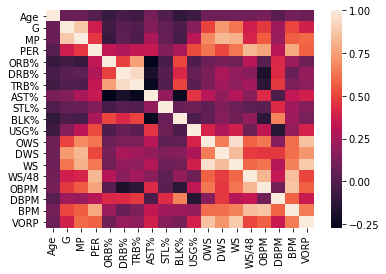

In [19]:
plt.show()

# Current Season Data and EDA

In [20]:
df2 = pd.read_csv('NBA2.csv')
df2.head()

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,Unnamed: 19,OWS,DWS,WS,WS/48,Unnamed: 24,OBPM,DBPM,BPM,VORP
0,1,Alex Abrines,SG,24,OKC,13,215,7.2,0.559,0.660,...,NaN,0.2,0.2,0.4,0.088,NaN,-1.5,-0.8,-2.3,0.0
1,2,Quincy Acy,PF,27,BRK,11,195,6.5,0.514,0.863,...,NaN,-0.1,0.1,0.1,0.014,NaN,-2.7,-0.4,-3.1,-0.1
2,3,Steven Adams,C,24,OKC,11,338,21.8,0.675,0.000,...,NaN,1.0,0.6,1.6,0.227,NaN,1.7,3.0,4.7,0.6
3,4,Bam Adebayo,C,20,MIA,8,112,14.4,0.539,0.000,...,NaN,0.2,0.2,0.3,0.148,NaN,-3.8,-1.3,-5.1,-0.1
4,5,Arron Afflalo,SG,32,ORL,10,90,3.6,0.417,0.471,...,NaN,-0.1,0.1,0.0,-0.014,NaN,-4.9,-0.5,-5.4,-0.1


In [22]:
df2.drop(['Rk', 'Unnamed: 19', 'Unnamed: 24'], axis=1, inplace=True)

In [23]:
df2.head()

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Alex Abrines,SG,24,OKC,13,215,7.2,0.559,0.660,0.149,...,10.7,11.4,0.2,0.2,0.4,0.088,-1.5,-0.8,-2.3,0.0
1,Quincy Acy,PF,27,BRK,11,195,6.5,0.514,0.863,0.196,...,19.0,14.2,-0.1,0.1,0.1,0.014,-2.7,-0.4,-3.1,-0.1
2,Steven Adams,C,24,OKC,11,338,21.8,0.675,0.000,0.281,...,16.0,15.3,1.0,0.6,1.6,0.227,1.7,3.0,4.7,0.6
3,Bam Adebayo,C,20,MIA,8,112,14.4,0.539,0.000,0.478,...,9.7,12.2,0.2,0.2,0.3,0.148,-3.8,-1.3,-5.1,-0.1
4,Arron Afflalo,SG,32,ORL,10,90,3.6,0.417,0.471,0.294,...,13.5,10.7,-0.1,0.1,0.0,-0.014,-4.9,-0.5,-5.4,-0.1


In [26]:
df2.isnull().sum()

Player    0
Pos       0
Age       0
Tm        0
G         0
MP        0
PER       1
TS%       4
3PAr      4
FTr       4
ORB%      1
DRB%      1
TRB%      1
AST%      1
STL%      1
BLK%      1
TOV%      4
USG%      1
OWS       0
DWS       0
WS        0
WS/48     1
OBPM      0
DBPM      0
BPM       0
VORP      0
dtype: int64

In [27]:
df2.dropna(axis=1, inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 13 columns):
Player    439 non-null object
Pos       439 non-null object
Age       439 non-null int64
Tm        439 non-null object
G         439 non-null int64
MP        439 non-null int64
OWS       439 non-null float64
DWS       439 non-null float64
WS        439 non-null float64
OBPM      439 non-null float64
DBPM      439 non-null float64
BPM       439 non-null float64
VORP      439 non-null float64
dtypes: float64(7), int64(3), object(3)
memory usage: 44.7+ KB


# '15-'16 Season Data and EDA

In [28]:
df3 = pd.read_csv('NBA3.csv')
df3.head()

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,Unnamed: 19,OWS,DWS,WS,WS/48,Unnamed: 24,OBPM,DBPM,BPM,VORP
0,1.0,Quincy Acy,PF,25.0,SAC,59.0,876.0,14.7,0.629,0.229,...,NaN,1.8,0.7,2.5,0.137,NaN,0.2,0.0,0.2,0.5
1,2.0,Jordan Adams,SG,21.0,MEM,2.0,15.0,17.3,0.427,0.167,...,NaN,0.0,0.0,0.0,0.015,NaN,-2.9,4.8,1.9,0.0
2,3.0,Steven Adams,C,22.0,OKC,80.0,2014.0,15.5,0.621,0.000,...,NaN,4.2,2.3,6.5,0.155,NaN,0.8,1.3,2.1,2.1
3,4.0,Arron Afflalo,SG,30.0,NYK,71.0,2371.0,10.9,0.531,0.298,...,NaN,1.8,0.9,2.7,0.055,NaN,-0.6,-1.8,-2.4,-0.2
4,5.0,Alexis Ajinca,C,27.0,NOP,59.0,861.0,13.8,0.514,0.003,...,NaN,0.2,0.9,1.0,0.058,NaN,-4.3,-0.2,-4.5,-0.5


In [30]:
df3.drop(['Rk', 'Unnamed: 19', 'Unnamed: 24'], axis=1, inplace=True)

In [31]:
df3.head()

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Quincy Acy,PF,25.0,SAC,59.0,876.0,14.7,0.629,0.229,0.318,...,10.0,13.1,1.8,0.7,2.5,0.137,0.2,0.0,0.2,0.5
1,Jordan Adams,SG,21.0,MEM,2.0,15.0,17.3,0.427,0.167,0.833,...,19.6,30.5,0.0,0.0,0.0,0.015,-2.9,4.8,1.9,0.0
2,Steven Adams,C,22.0,OKC,80.0,2014.0,15.5,0.621,0.000,0.460,...,14.1,12.6,4.2,2.3,6.5,0.155,0.8,1.3,2.1,2.1
3,Arron Afflalo,SG,30.0,NYK,71.0,2371.0,10.9,0.531,0.298,0.164,...,8.7,17.9,1.8,0.9,2.7,0.055,-0.6,-1.8,-2.4,-0.2
4,Alexis Ajinca,C,27.0,NOP,59.0,861.0,13.8,0.514,0.003,0.197,...,13.6,20.4,0.2,0.9,1.0,0.058,-4.3,-0.2,-4.5,-0.5


In [32]:
df.isnull().sum()

Player    0
Pos       0
Age       0
Tm        0
G         0
MP        0
PER       0
ORB%      0
DRB%      0
TRB%      0
AST%      0
STL%      0
BLK%      0
USG%      0
OWS       0
DWS       0
WS        0
WS/48     0
OBPM      0
DBPM      0
BPM       0
VORP      0
dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595 entries, 0 to 594
Data columns (total 22 columns):
Player    595 non-null object
Pos       595 non-null object
Age       595 non-null int64
Tm        595 non-null object
G         595 non-null int64
MP        595 non-null int64
PER       595 non-null float64
ORB%      595 non-null float64
DRB%      595 non-null float64
TRB%      595 non-null float64
AST%      595 non-null float64
STL%      595 non-null float64
BLK%      595 non-null float64
USG%      595 non-null float64
OWS       595 non-null float64
DWS       595 non-null float64
WS        595 non-null float64
WS/48     595 non-null float64
OBPM      595 non-null float64
DBPM      595 non-null float64
BPM       595 non-null float64
VORP      595 non-null float64
dtypes: float64(16), int64(3), object(3)
memory usage: 102.3+ KB
